['../../Data/blocksworld/medium.cnf', '../../Data/blocksworld/huge.cnf', '../../Data/blocksworld/bw_large.a.cnf', '../../Data/blocksworld/bw_large.c.cnf', '../../Data/blocksworld/bw_large.b.cnf', '../../Data/blocksworld/anomaly.cnf', '../../Data/blocksworld/bw_large.d.cnf']
Entering training loop
0.52014315 0.3573298 (1087,)
0.5 0.5 (1087,)
0.5275905 0.36126658 (459,)
0.5096743 0.348755 (6325,)
0.5 0.5 (459,)
0.5 0.5 (6325,)
epoch 1 of 15
batch_number 0
batch_number 1
batch_number 2
model successfully saved
0.47367182 0.08289489 (1087,)
0.4599914 0.08278963 (459,)
0.48820263 0.08011278 (6325,)
Epoch 1 in 70.94 sec;  test total loss: 0.5601999759674072; test loss Deepmind: 0.11100000143051147; test loss LLL: 0.44909998774528503; test loss entropy: 0.0; train total loss: 0.39590001106262207; train loss Deepmind: 0.10090000182390213; train loss LLL: 0.29499998688697815; train loss entropy: 0.0; test loss model Moser: 0.0056; test loss uniform Moser: 0.0172; train loss model Moser: 0.0154;

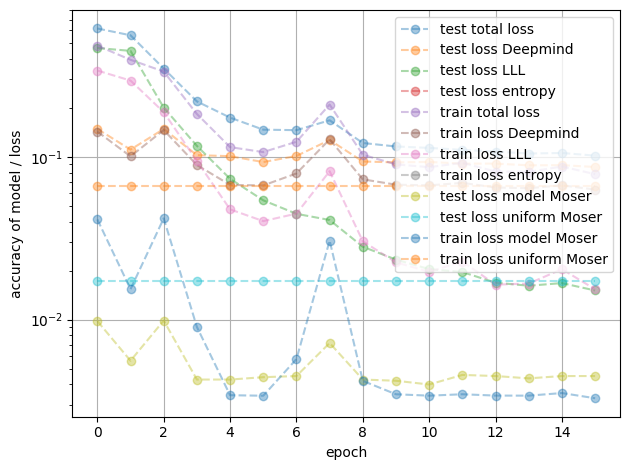

In [1]:
import sys
import glob
sys.path.append("../../")

from python.src.train import experiment_tracking_train
from python.src.sat_representations import VCG, LCG, SATRepresentation
from pathlib import Path
NUM_EPOCHS = 15  # 10
f = 0.0000001
alpha = 1
beta = 1
gamma = 0
batch_size = 2
# path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/GIT_SAT_ML/data/blocksworld"
# path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset"
path = "../../Data/blocksworld"
# path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/GIT_SAT_ML/data/LLL_sample_one"
# path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_LLL_n80/"
N_STEPS_MOSER = 1000
N_RUNS_MOSER = 5
SEED = 0
graph_representation = "LCG"
network_type = "interaction"
# network_definition = get_network_definition(network_type = network_type, graph_representation = graph_representation) #network_definition_interaction_new

MODEL_REGISTRY = Path("../../../mlrun_save")
EXPERIMENT_NAME = "blocksworld_LCG_interaction"

model_path = "../../../params_save/" + EXPERIMENT_NAME
img_path = False # model_path + "_plot"

match graph_representation:
    case "LCG":
            rep = LCG
    case "VCG":
            rep = VCG
print(glob.glob(glob.escape(path) + "/*.cnf"))


experiment_tracking_train(
        MODEL_REGISTRY,
        EXPERIMENT_NAME,
        batch_size,
        f,
        alpha,
        beta,
        gamma,
        NUM_EPOCHS,
        N_STEPS_MOSER,
        N_RUNS_MOSER,
        path,
        img_path="show",
        model_path=model_path,
        graph_representation=rep,
        network_type=network_type,
    )

In [ ]:
import sys
import glob
sys.path.append("../../")
from pysat.formula import CNF
import numpy as np
from python.src.sat_instances import get_problem_from_cnf
from python.src.sat_representations import VCG, LCG, SATRepresentation
def do():
        n = 10
        m = 26
        k = 2
        mask = LCG.get_mask(n, 2*n + m)
        H = CNF()
        counter = 0
        for i in range(m):
            c = []
            for j in range(k):
                c.append(-1*((counter + j)%n + 1))
            counter += 1
            H.append(c)
        problem = get_problem_from_cnf(H, LCG, include_constraint_graph=0)
        g = problem.graph
        decoded_nodes = []
        for i in range(2*n + m):
            if i%2 == 0 and i< 2*n:
                decoded_nodes.append(10000)
            else:
                decoded_nodes.append(0)
        decoded_nodes = np.array([decoded_nodes]).T
        print(decoded_nodes)
        assert decoded_nodes.shape == (2*n + m, 1)
        mask = LCG.get_mask(n, 2*n + m)
        neighbors_list = LCG.get_constraint_graph(n, m, g.senders, g.receivers)
        print(neighbors_list)
        loss = LCG.local_lovasz_loss(decoded_nodes, mask, g, neighbors_list)
        print(loss)

In [ ]:
do()

[[10000]
 [    0]
 [10000]
 [    0]
 [10000]
 [    0]
 [10000]
 [    0]
 [10000]
 [    0]
 [10000]
 [    0]
 [10000]
 [    0]
 [10000]
 [    0]
 [10000]
 [    0]
 [10000]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]]
[[20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22 23
  23 23 23 23 23 23 23 24 24 24 24 24 24 24 25 25 25 25 25 25 26 26 26 26
  26 27 27 27 27 27 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30 30 30 30
  31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33
  34 34 34 34 34 34 34 35 35 35 35 35 35 36 36 36 36 36 37 37 37 37 37 38
  38 38 38 38 39 39 39 39 39 39 40 40 40 40 40 40 40 41 41 41 41 41 41 41
  41 42 42 42 42 42 42 42 42 43 43 43 43 43 43 43 43 44 44 44 44 44 44 44]
 [41 31 21 40 39 30 29 42 32 22 41 40 31 30 20 43 33 23 42 41 32 31 21 44
 

TypeError: logistic does not accept dtype int32. Accepted dtypes are subtypes of floating, complexfloating.